# Risk and Reward analysis

In [1]:
# LIbraries
import pandas as pd              #data handling
import numpy as np               #Maths
import seaborn as sb             #Data vsiulaization
import matplotlib.pyplot as plt  #ploting graphs

In [2]:
# Setting default parameters
plt.rcParams['figure.figsize'] = (15,4)
plt.style.use('fivethirtyeight')

In [3]:
# Reading data from the files
stock_data = pd.read_csv('stock_data.csv', parse_dates = True, index_col = ['Date'])
print('Shape of stock data = ',stock_data.shape)
bench_data = pd.read_csv('benchmark_data.csv', parse_dates = True, index_col = ['Date'])
print('Shape of bench data = ',bench_data.shape)

Shape of stock data =  (252, 2)
Shape of bench data =  (261, 1)


In [4]:
# removing duplicate values
stock_data = stock_data.dropna()
bench_data = bench_data.dropna()

print('Shape of stock data = ',stock_data.shape)
print('Shape of bench data = ',bench_data.shape)

Shape of stock data =  (252, 2)
Shape of bench data =  (252, 1)


In [5]:
print('Stock Data : Amazon & Facebook ----------------------')
print(stock_data.head())
print('\n',stock_data.tail())
print('-----------------------------------------------------')

print('\n\nBenchmark Data : S&P Global ---------------------')
print(bench_data.head())
print('\n',bench_data.tail())
print('-----------------------------------------------------')

Stock Data : Amazon & Facebook ----------------------
                Amazon    Facebook
Date                              
2016-01-04  636.989990  102.220001
2016-01-05  633.789978  102.730003
2016-01-06  632.650024  102.970001
2016-01-07  607.940002   97.919998
2016-01-08  607.049988   97.330002

                 Amazon    Facebook
Date                              
2016-12-23  760.590027  117.269997
2016-12-27  771.400024  118.010002
2016-12-28  772.130005  116.919998
2016-12-29  765.150024  116.349998
2016-12-30  749.869995  115.050003
-----------------------------------------------------


Benchmark Data : S&P Global ---------------------
            S&P 500
Date               
2016-01-04  2012.66
2016-01-05  2016.71
2016-01-06  1990.26
2016-01-07  1943.09
2016-01-08  1922.03

             S&P 500
Date               
2016-12-23  2263.79
2016-12-27  2268.88
2016-12-28  2249.92
2016-12-29  2249.26
2016-12-30  2238.83
-----------------------------------------------------


In [6]:
print('DESCRIPTIVE STATISTICS')

print('\nStock Data : Amazon & Facebook ----------------------')
print('\n',stock_data.describe())
print('----------------------------------')

print('\n\nBenchmark Data : S&P Global ---------------------')
print('\n',bench_data.describe())
print('----------------------------------')

DESCRIPTIVE STATISTICS

Stock Data : Amazon & Facebook ----------------------

            Amazon    Facebook
count  252.000000  252.000000
mean   699.523135  117.035873
std     92.362312    8.899858
min    482.070007   94.160004
25%    606.929993  112.202499
50%    727.875000  117.765000
75%    767.882492  123.902502
max    844.359985  133.279999
----------------------------------


Benchmark Data : S&P Global ---------------------

            S&P 500
count   252.000000
mean   2094.651310
std     101.427615
min    1829.080000
25%    2047.060000
50%    2104.105000
75%    2169.075000
max    2271.720000
----------------------------------


### ---> Visualizing Data

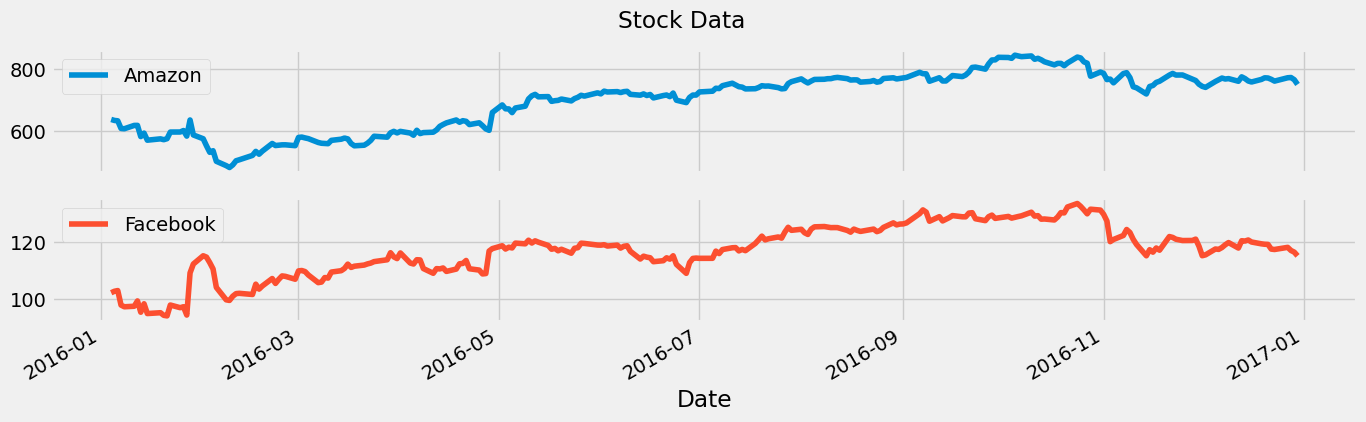

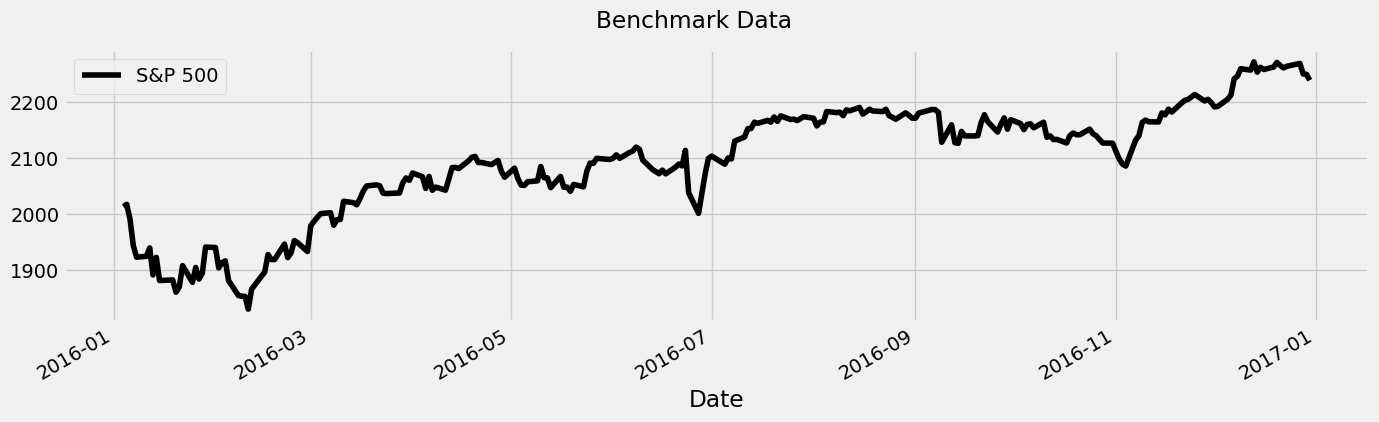

In [7]:
# visualizing stock market data
stock_data.plot(subplots = True, title = "Stock Data")
bench_data.plot(subplots = True, title = "Benchmark Data", color = 'black')
plt.show()

### ---> Calculating the Daily Stock Returns

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


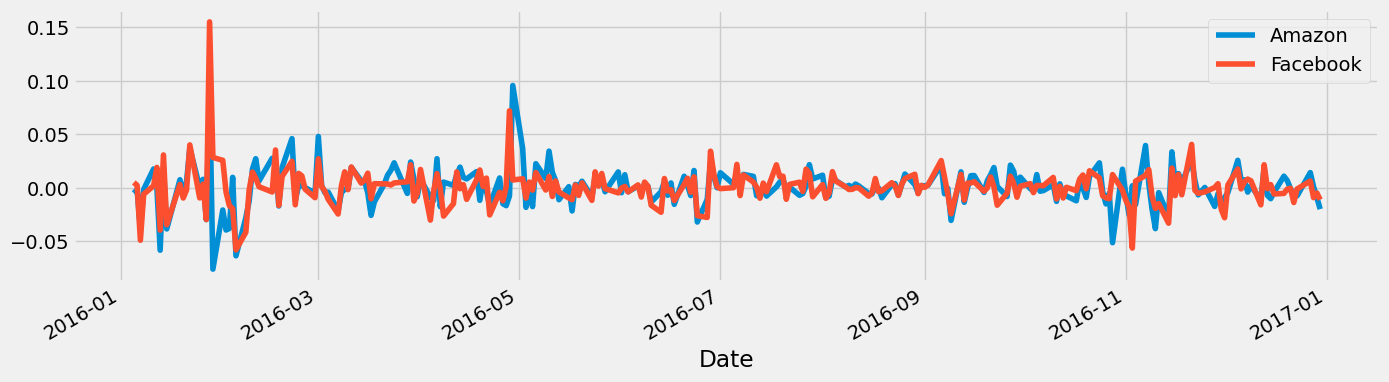

In [8]:
# calculate daily stock return
stock_returns = stock_data.pct_change()

#plot the calculated stock return
stock_returns.plot()
plt.show

# summerizing daily returns
stock_returns.describe()

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

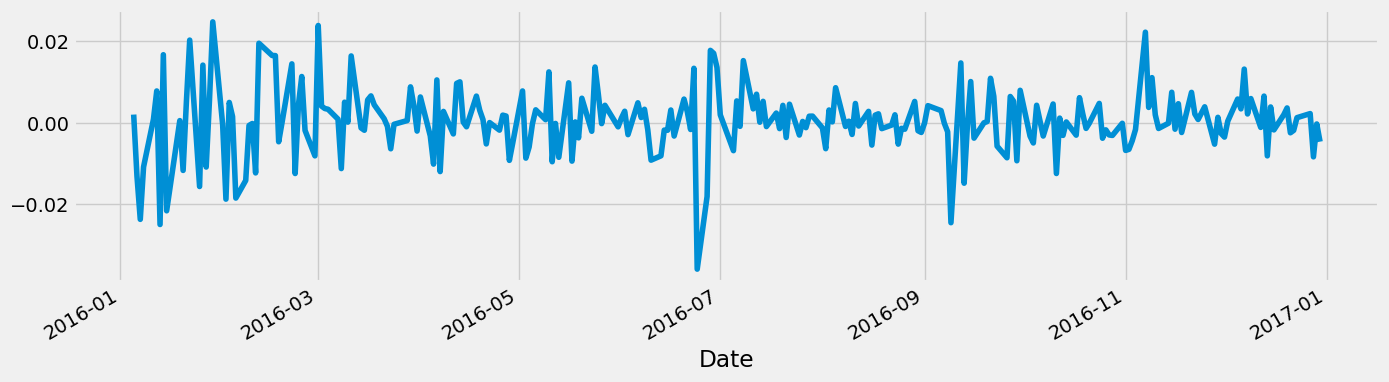

In [12]:
# calculate daily stock return
bench_returns = bench_data['S&P 500'].pct_change()

#plot the calculated stock return
bench_returns.plot()
plt.show

# summerizing daily returns
bench_returns.describe()


### ---> Calculating the Excess Returns

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


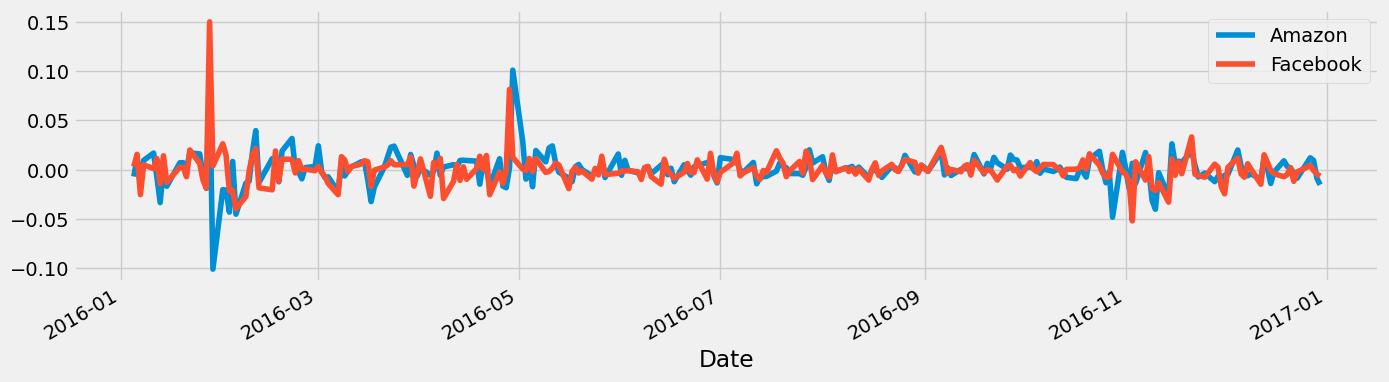

In [13]:
# calculating difference in daily return
excess_returns = stock_returns.sub(bench_returns, axis = 0)

excess_returns.plot()

excess_returns.describe()

## ---> Calculating the SHARPE RATIO

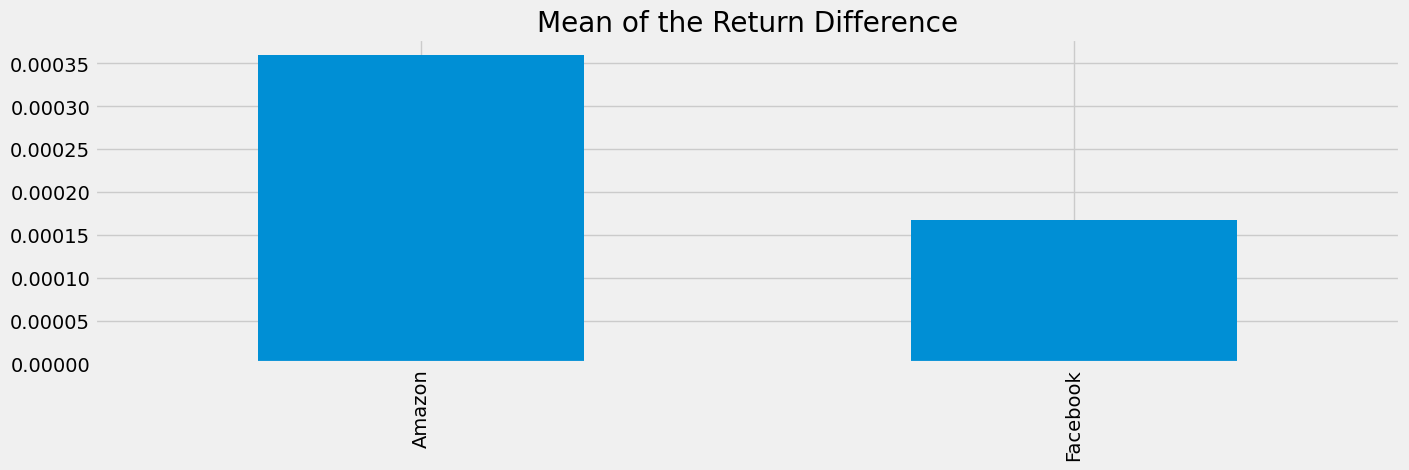

In [15]:
# calculate the mean of excess return
avg_excess_returns = excess_returns.mean()
avg_excess_returns.plot.bar(title = 'Mean of the Return Difference')
plt.show()

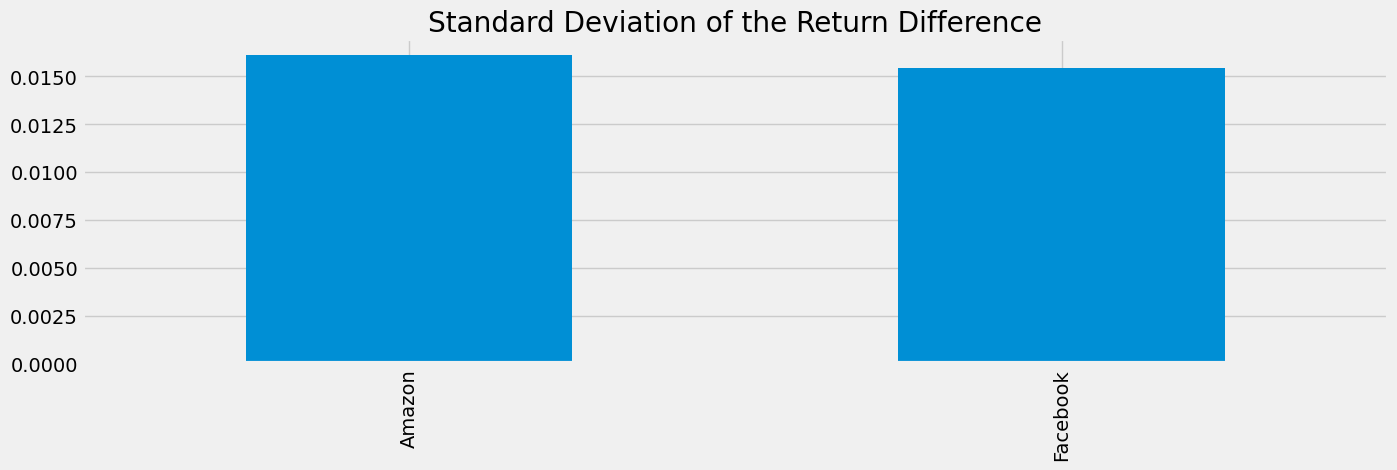

In [16]:
# calculate the standard deviation
sd_excess_returns = excess_returns.std()
sd_excess_returns.plot.bar(title = 'Standard Deviation of the Return Difference')
plt.show()

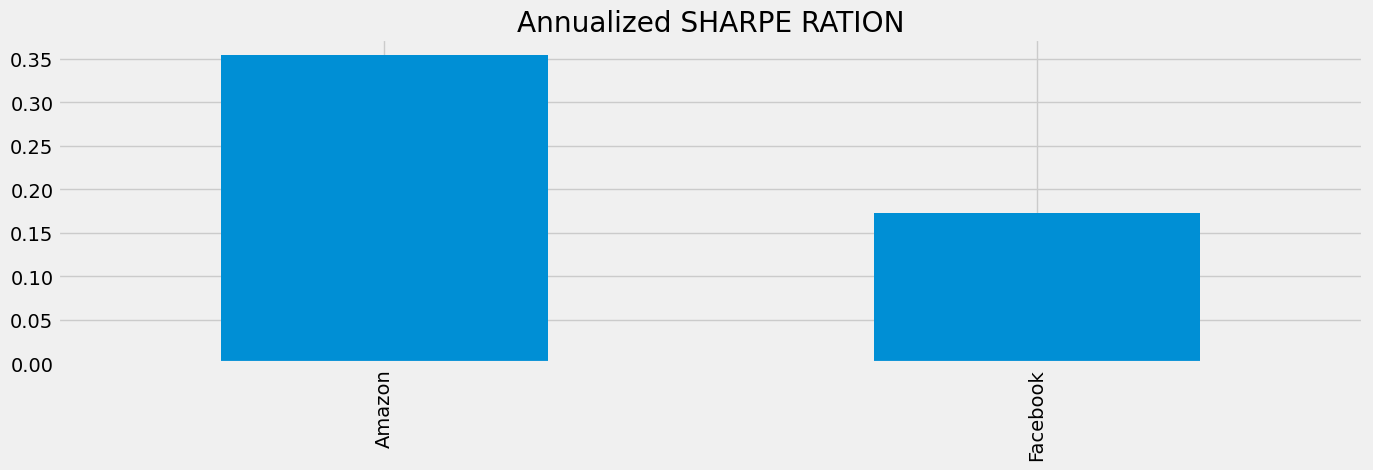

In [17]:
# calculating the daily sharpe ratio
daily_SR = avg_excess_returns.div(sd_excess_returns)

# annualize the sharpe ratio
annual_fac = np.sqrt(252)
annual_SR = daily_SR.mul(annual_fac)
annual_SR.plot.bar(title = 'Annualized SHARPE RATION')
plt.show()

# THE END